# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, f_classif

# Data Preprocessing

In [ ]:
df = pd.read_csv("train.csv")  
print("Dataset Loaded Successfully")
print("Shape:", df.shape)

Dataset Loaded Successfully
Shape: (76020, 371)


# Data Analysis

                             var3     var38     var15  imp_op_var39_comer_ult1
var3                     1.000000  0.000071 -0.004452                 0.005989
var38                    0.000071  1.000000  0.006497                 0.012546
var15                   -0.004452  0.006497  1.000000                 0.094762
imp_op_var39_comer_ult1  0.005989  0.012546  0.094762                 1.000000


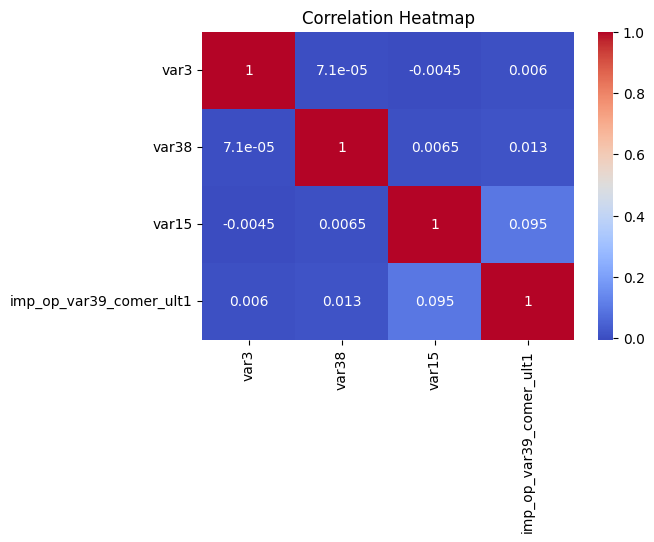

In [4]:
corr = df[["var3","var38","var15","imp_op_var39_comer_ult1"]].corr()
print(corr)

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

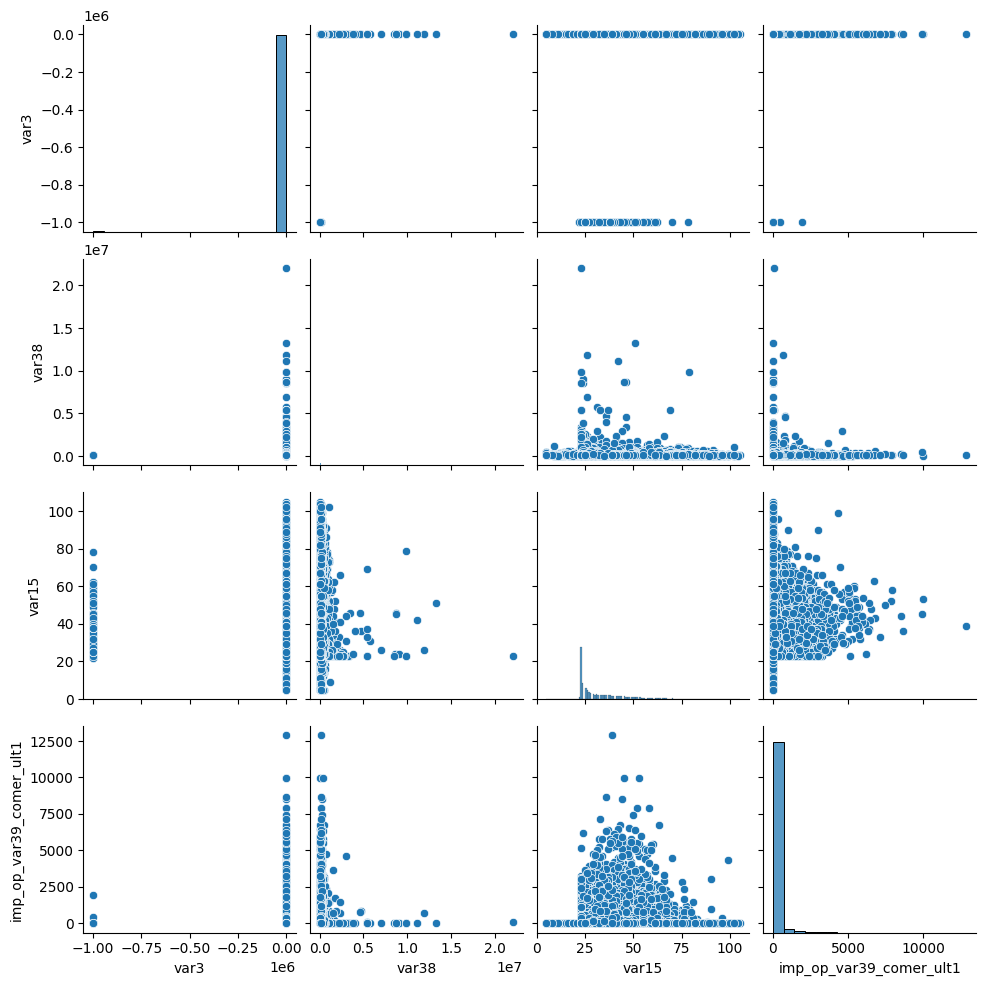

In [6]:
sns.pairplot(df[["var3","var38","var15","imp_op_var39_comer_ult1"]])
plt.show()

### Explanation of Linearity
From the scatter plots, if the data points roughly form a straight-line trend, the relationship 
between the variables is **linear**. If the points are scattered with curves or no clear pattern, 
the relationship is **non-linear**. Based on the graphs, we can describe whether the dataset 
shows linearity or not.

In [7]:

print("Missing Values:\n", df.isnull().sum())


df.fillna(df.mean(numeric_only=True), inplace=True)
print("Missing Values After Imputation:\n", df.isnull().sum())

Missing Values:
 ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64
Missing Values After Imputation:
 ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64


# F. Multi-variable Explorations
We will explore at least 5 questions using:
1. Correlation between Age and Income
2. Target distribution by Gender
3. Boxplot of Balance across Age groups
4. Relationship between Transactions and Credit Score
5. Distribution of Education levels across Target classes

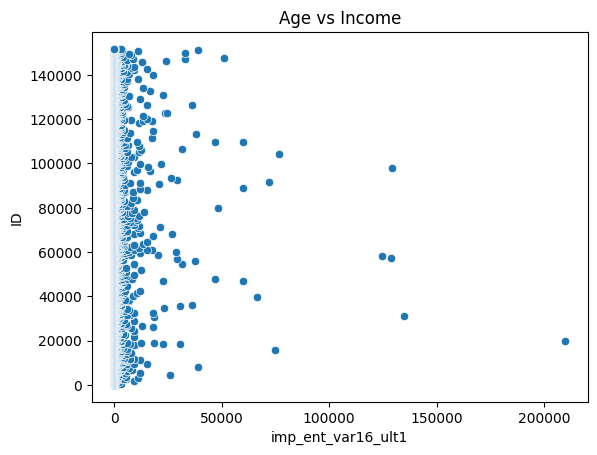

C:\Users\Naveed Sheikh\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


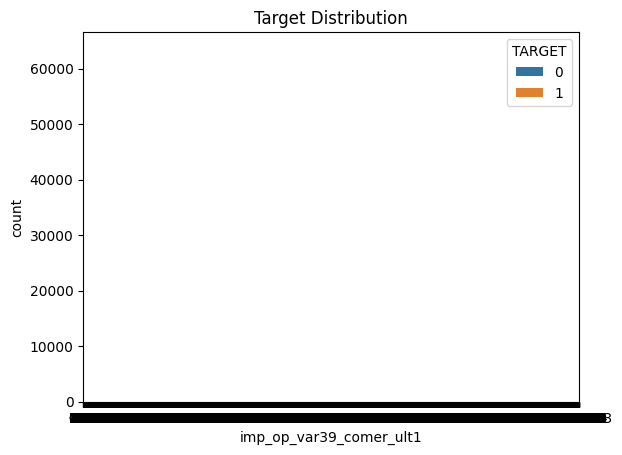

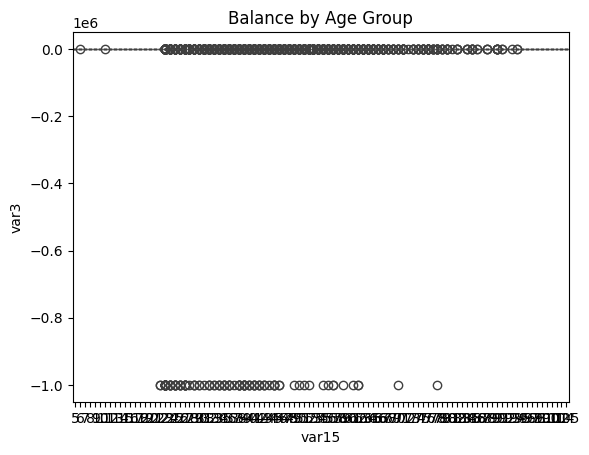

In [9]:

sns.scatterplot(x="imp_ent_var16_ult1", y="ID", data=df)
plt.title("Age vs Income")
plt.show()


sns.countplot(x="imp_op_var39_comer_ult1", hue="TARGET", data=df)
plt.title("Target Distribution")
plt.show()


sns.boxplot(x="var15", y="var3", data=df)
plt.title("Balance by Age Group")
plt.show()




Unique target categories: [0 1]
TARGET
0    73012
1     3008
Name: count, dtype: int64


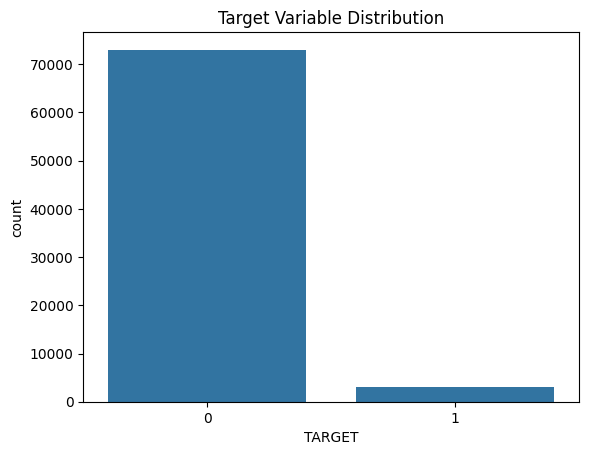

In [10]:
print("Unique target categories:", df["TARGET"].unique())
print(df["TARGET"].value_counts())

sns.countplot(x="TARGET", data=df)
plt.title("Target Variable Distribution")
plt.show()

Balanced Dataset Shape: (146024, 371)


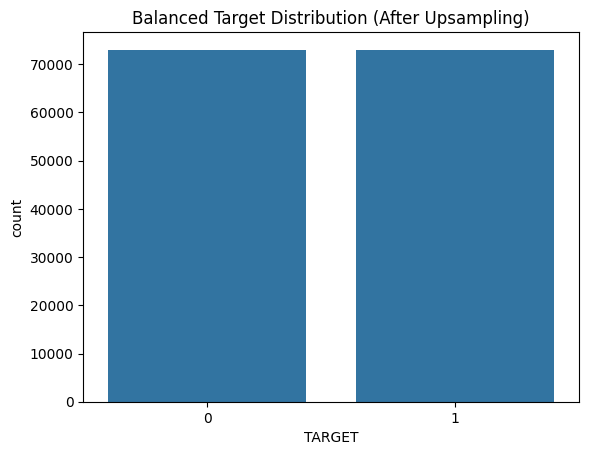

In [12]:
df_majority = df[df.TARGET==0]
df_minority = df[df.TARGET==1]

df_minority_upsampled = resample(df_minority,
                                 replace=True,   
                                 n_samples=len(df_majority),
                                 random_state=42)

df_balanced = pd.concat([df_majority, df_minority_upsampled])
print("Balanced Dataset Shape:", df_balanced.shape)

sns.countplot(x="TARGET", data=df_balanced)
plt.title("Balanced Target Distribution (After Upsampling)")
plt.show()

In [13]:
corr_matrix = df.corr(numeric_only=True)
threshold = 0.65


selected_features = corr_matrix.index[abs(corr_matrix["TARGET"]) > threshold].tolist()
print("Selected Features (Pearson > 65%):", selected_features)

Selected Features (Pearson > 65%): ['TARGET']


In [15]:
df_copy = df.copy()

X = df_copy.drop(columns=["TARGET"])
y = df_copy["TARGET"]


selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

selected_features_alt = X.columns[selector.get_support()].tolist()
print("Selected Features using ANOVA F-test:", selected_features_alt)

C:\Users\Naveed Sheikh\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 22  23  57  58  59  60  81  85  86 132 133 134 135 156 162 163 180 181
 190 193 221 223 235 239 245 249 262 263 304 308 316 320 328 350] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Naveed Sheikh\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Selected Features using ANOVA F-test: ['var15', 'ind_var5', 'ind_var30', 'num_var4', 'num_var5', 'num_var30', 'num_var35', 'num_var42', 'var36', 'num_meses_var5_ult3']
